In [1]:
import pandas as pd

In [2]:
df_declaracao_servico = pd.read_csv('../Datasets/iss_declaracao_anonimizado.csv', sep=';')
df_declaracao_servico

,row,id_empresa,competencia,tipo,imposto
0,1,1,201106,Prestado,"127,24"
1,2,1,201907,Prestado,"587,1348"
2,3,1,201112,Prestado,"160,62"
3,4,1,201704,Prestado,"312,94"
4,5,1,202304,Prestado,"122,54"
...,...,...,...,...,...
281430,281431,6365,202305,Prestado,90
281431,281432,6366,202304,Prestado,"135,96"
281432,281433,6367,202305,Prestado,260
281433,281434,6368,202305,Tomado,20


In [3]:
df_declaracao_servico['imposto'] = df_declaracao_servico['imposto'].str.replace(',', '.').astype(float).round(2)
df_declaracao_servico

,row,id_empresa,competencia,tipo,imposto
0,1,1,201106,Prestado,127.24
1,2,1,201907,Prestado,587.13
2,3,1,201112,Prestado,160.62
3,4,1,201704,Prestado,312.94
4,5,1,202304,Prestado,122.54
...,...,...,...,...,...
281430,281431,6365,202305,Prestado,90.00
281431,281432,6366,202304,Prestado,135.96
281432,281433,6367,202305,Prestado,260.00
281433,281434,6368,202305,Tomado,20.00


In [4]:
df_declaracao_servico['competencia'] = df_declaracao_servico['competencia'].astype(str) + '01'
df_declaracao_servico

,row,id_empresa,competencia,tipo,imposto
0,1,1,20110601,Prestado,127.24
1,2,1,20190701,Prestado,587.13
2,3,1,20111201,Prestado,160.62
3,4,1,20170401,Prestado,312.94
4,5,1,20230401,Prestado,122.54
...,...,...,...,...,...
281430,281431,6365,20230501,Prestado,90.00
281431,281432,6366,20230401,Prestado,135.96
281432,281433,6367,20230501,Prestado,260.00
281433,281434,6368,20230501,Tomado,20.00


In [5]:
df_declaracao_servico['competencia'] = pd.to_datetime(df_declaracao_servico['competencia'], format='%Y%m%d')
df_declaracao_servico

,row,id_empresa,competencia,tipo,imposto
0,1,1,2011-06-01,Prestado,127.24
1,2,1,2019-07-01,Prestado,587.13
2,3,1,2011-12-01,Prestado,160.62
3,4,1,2017-04-01,Prestado,312.94
4,5,1,2023-04-01,Prestado,122.54
...,...,...,...,...,...
281430,281431,6365,2023-05-01,Prestado,90.00
281431,281432,6366,2023-04-01,Prestado,135.96
281432,281433,6367,2023-05-01,Prestado,260.00
281433,281434,6368,2023-05-01,Tomado,20.00


In [6]:
df_servicos_prestados = df_declaracao_servico[df_declaracao_servico['tipo'] == 'Prestado']
df_servicos_prestados = df_servicos_prestados.drop(columns=['tipo', 'row'])
df_servicos_prestados


,id_empresa,competencia,imposto
0,1,2011-06-01,127.24
1,1,2019-07-01,587.13
2,1,2011-12-01,160.62
3,1,2017-04-01,312.94
4,1,2023-04-01,122.54
...,...,...,...
281429,6364,2023-04-01,1286.04
281430,6365,2023-05-01,90.00
281431,6366,2023-04-01,135.96
281432,6367,2023-05-01,260.00


In [7]:
df_iss_competencia = df_servicos_prestados.drop(columns=['id_empresa']).groupby(['competencia']).sum(['imposto'])
df_iss_competencia = df_iss_competencia.reset_index()
df_iss_competencia

,competencia,imposto
0,2005-01-01,10.75
1,2005-07-01,185.85
2,2005-10-01,3.00
3,2005-11-01,28.19
4,2005-12-01,31.24
...,...,...
209,2023-01-01,2396203.84
210,2023-02-01,2608697.45
211,2023-03-01,2914846.69
212,2023-04-01,1084466.38


In [8]:
#filtrando o mes 05/2023 pois este foi o mes da coleta dos dados (na metade do  mês), então, ainda estão faltando declarações 
#df_iss_competencia = df_iss_competencia[df_iss_competencia['competencia'] < '2023-05-01']
df_iss_competencia = df_iss_competencia[(df_iss_competencia['competencia'] <= '2023-03-01') & (df_iss_competencia['competencia'] >= '2008-01-01')]

In [9]:
print(df_iss_competencia['competencia'].min())
print(df_iss_competencia['competencia'].max())


2008-01-01 00:00:00
2023-03-01 00:00:00


In [10]:
df_iss_competencia

,competencia,imposto
29,2008-01-01,193283.34
30,2008-02-01,211406.84
31,2008-03-01,220740.14
32,2008-04-01,254053.26
33,2008-05-01,367762.04
...,...,...
207,2022-11-01,2735806.00
208,2022-12-01,2800769.04
209,2023-01-01,2396203.84
210,2023-02-01,2608697.45


In [11]:
data = df_iss_competencia.set_index('competencia')
data

,imposto
competencia,
2008-01-01,193283.34
2008-02-01,211406.84
2008-03-01,220740.14
2008-04-01,254053.26
2008-05-01,367762.04
...,...
2022-11-01,2735806.00
2022-12-01,2800769.04
2023-01-01,2396203.84


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data['imposto'] = scaler.fit_transform(data)
data

,imposto
competencia,
2008-01-01,0.000000
2008-02-01,0.006659
2008-03-01,0.010089
2008-04-01,0.022329
2008-05-01,0.064110
...,...
2022-11-01,0.934214
2022-12-01,0.958084
2023-01-01,0.809432


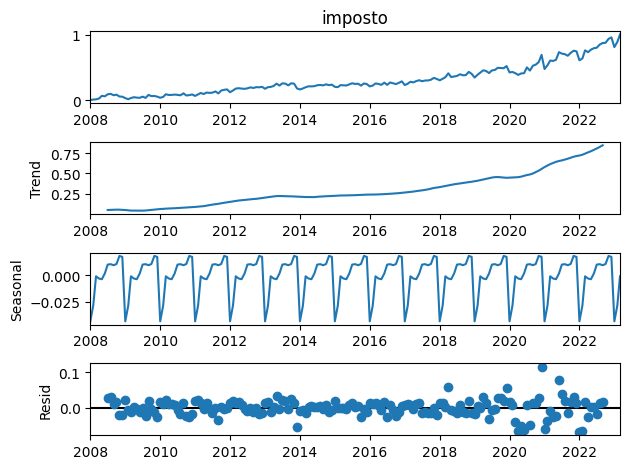

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
ssn = seasonal_decompose(data['imposto'], model='add')
ssn.plot();

In [15]:
train = data.iloc[:len(data)-6]
test = data.iloc[len(data)-6:]

start = len(train)
end = len(train) + len(test) -1

print(train)
print(test)

print(start)
print(end)


              imposto
competencia          
2008-01-01   0.000000
2008-02-01   0.006659
2008-03-01   0.010089
2008-04-01   0.022329
2008-05-01   0.064110
...               ...
2022-05-01   0.770007
2022-06-01   0.792021
2022-07-01   0.799356
2022-08-01   0.848114
2022-09-01   0.870644

[177 rows x 1 columns]
              imposto
competencia          
2022-10-01   0.874863
2022-11-01   0.934214
2022-12-01   0.958084
2023-01-01   0.809432
2023-02-01   0.887510
2023-03-01   1.000000
177
182


In [16]:
from pmdarima import auto_arima
auto_arima_results= auto_arima(train['imposto'], 
           start_p=0,
           start_q=0,
           max_p=10,
           max_q=10,          # maximum p and q
           m=12,              # frequency of series
           d=None,           # let model determine 'd'
           seasonal=True,  
           start_P=0, 
           D=None,  
           trace=True,
           error_action='ignore',  
           suppress_warnings=True, 
           stepwise=True)

auto_arima_results.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=-694.966, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-664.030, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-717.484, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-715.753, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-662.786, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-675.141, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=-716.161, Time=0.64 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-720.417, Time=0.39 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=-710.243, Time=0.13 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-718.733, Time=1.05 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=-721.310, Time=1.31 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=-711.950, Time=0.71 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=-721.959, Time=1.13 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=-700.895, Time=0.98 sec
 ARIMA(2,1,0)(2,0,2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  177
Model:             SARIMAX(2, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood                 369.546
Date:                                 Wed, 17 May 2023   AIC                           -727.092
Time:                                         00:25:44   BIC                           -708.070
Sample:                                     01-01-2008   HQIC                          -719.377
                                          - 09-01-2022                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3854      0.055     -6.957      0.000      -0.494      -0.277
ar.L2         -0.1284      0.062     -2.081      0.037      -0.249      -0.007
ar.S.L12       0.9556      0.083     11.532      0.000       0.793       1.118
ma.S.L12      -0.5664      0.131     -4.340      0.000      -0.822      -0.311
ma.S.L24      -0.1971      0.111     -1.774      0.076      -0.415       0.021
sigma2         0.0008   6.51e-05     12.882      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):               120.00
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               6.33   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.03525D+00    |proj g|=  6.35239D+00

At iterate    5    f= -2.04989D+00    |proj g|=  5.71847D-01

At iterate   10    f= -2.06393D+00    |proj g|=  4.00784D+00

At iterate   15    f= -2.07170D+00    |proj g|=  5.86395D-01

At iterate   20    f= -2.07210D+00    |proj g|=  8.58483D-01

At iterate   25    f= -2.07367D+00    |proj g|=  1.50632D-01

At iterate   30    f= -2.07411D+00    |proj g|=  1.07671D+00

At iterate   35    f= -2.08334D+00    |proj g|=  4.06087D-01

At iterate   40    f= -2.08454D+00    |proj g|=  4.19567D-01

At iterate   45    f= -2.08763D+00    |proj g|=  5.52630D-01

At iterate   50    f= -2.08783D+00    |proj g|=  3.91100D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/usr/local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot: title={'center': 'Real vs Predições - Dataset de teste'}, xlabel='competencia'>

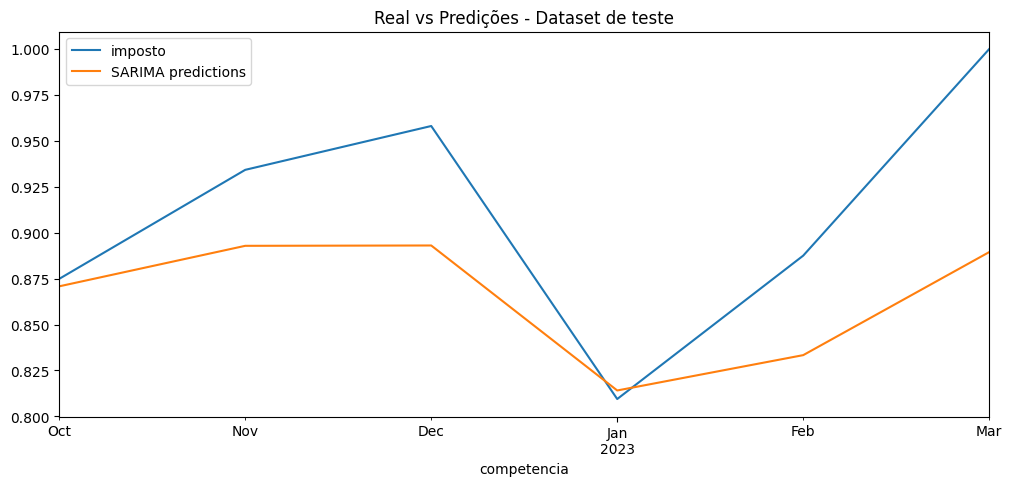

In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

#sarima_model= SARIMAX(train["imposto"], order=(1, 1, 2), seasonal_order=(1, 0, [], 12))
sarima_model= SARIMAX(train["imposto"], order=(2, 1, 0), seasonal_order=(1, 0, [1, 2], 12))

sarima_model_fit= sarima_model.fit()

pred = sarima_model_fit.predict(start=start, end=end, dynamic=False, ).rename("SARIMA predictions")


test["imposto"].plot(figsize=(12,5), title= "Real vs Predições - Dataset de teste", legend=True);
pred.plot(legend=True)

In [43]:
import numpy as np
scaler.inverse_transform(np.array(pred).reshape(-1, 1))

array([[2563198.88599074],
       [2623222.2235831 ],
       [2623724.258708  ],
       [2408871.9452452 ],
       [2461238.05553651],
       [2613946.2250344 ]])

<AxesSubplot: title={'center': 'Real vs Predições - Dataset de teste'}, xlabel='competencia'>

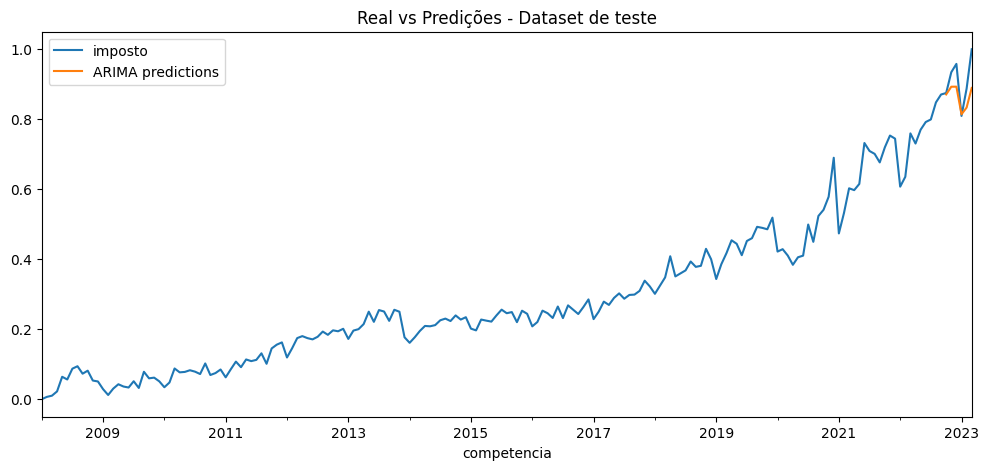

In [39]:
pred = sarima_model_fit.predict(start=start, end=end, dynamic=True, typ="levels").rename("ARIMA predictions")


data["imposto"].plot(figsize=(12,5), title= "Real vs Predições - Dataset de teste", legend=True)
pred.plot(legend=True)

<AxesSubplot: title={'center': 'Real vs Predições - Dataset de teste'}, xlabel='competencia'>

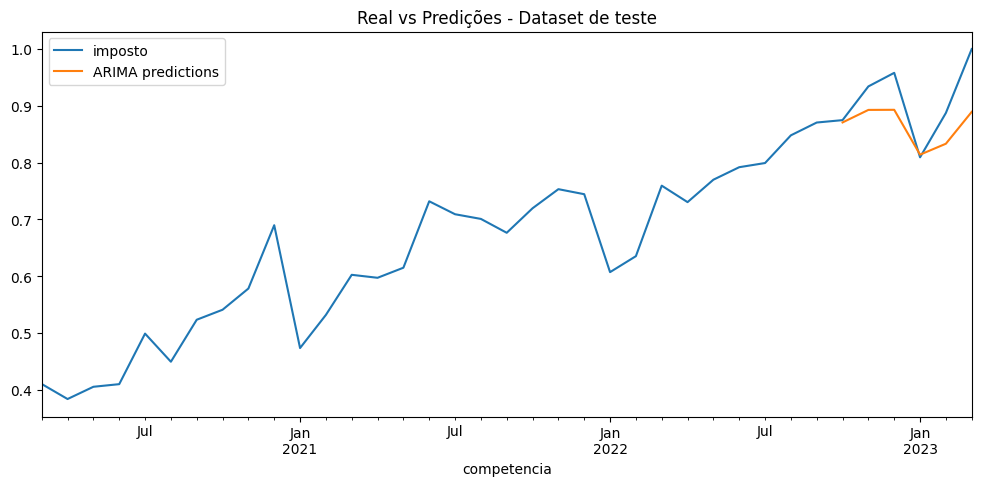

In [21]:
data.iloc[len(data)-37:]["imposto"].plot(figsize=(12,5), title= "Real vs Predições - Dataset de teste", legend=True)
pred.plot(legend=True)

<AxesSubplot: title={'center': 'Real vs Predições - Dataset de teste'}, xlabel='competencia'>

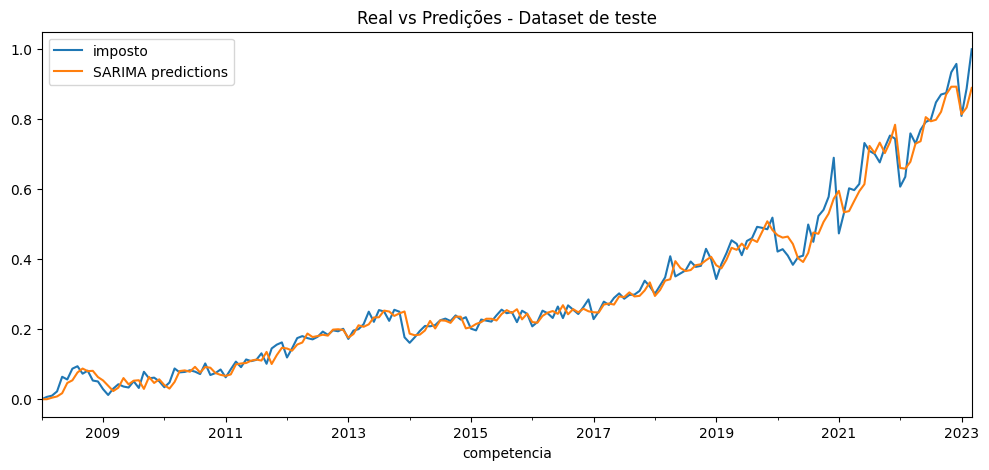

In [27]:
pred = sarima_model_fit.predict(start=0, end=end, dynamic=False, typ="levels").rename("SARIMA predictions")


data["imposto"].plot(figsize=(12,5), title= "Real vs Predições - Dataset de teste", legend=True)
pred.plot(legend=True)